<a href="https://colab.research.google.com/github/heydoorong/project/blob/master/poj3__ds_dy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic



가이드

    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    -League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min


---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Colab Notebook에 Kaggle API 세팅


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'dooyoungchoi'
os.environ['KAGGLE_KEY'] = '40acc23d00a6137415de43da77fd4b05'

### 2. 데이터 다운로드 및 압축 해제


In [ ]:
!kaggle -h


usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드 (!kaggle ~)
# Linux 명령어로 압축 해제

!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
!unzip '*.zip'

league-of-legends-diamond-ranked-games-10-min.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  league-of-legends-diamond-ranked-games-10-min.zip
replace high_diamond_ranked_10min.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

###  3. Pandas 라이브러리로 csv파일


In [ ]:
# pd.read_csv()로 csv파일
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [ ]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


## Step 2. EDA 및 데이터 기초 통계 분석


###  4. 데이터프레임의 각 컬럼 분석


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석 (head(), info(), describe())

df.head()

# 중복되는 내용들 diff 값의 경우 같은 값이니 뺄 필요 -만 붙이면 됌
# 같은 의미인 데이터는 제거


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df.info()

# 현재 데이터는 비어있는 값이 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
df.describe()

# 0 또는 1 classification 값 확인 정수값 확인
# bluewins 같은 경우 거의 0.5 / 승패확률이 49.99 로 거의 비슷해서 ballanced한 데이터
# 수치형 데이터 보다는 0 또는 1로 추정되는 값들만 집중
# blueFirstBlood -> 0.5에 가까움
# blueEliteMonsters -> 10분안에 최대 두개 생성 , 추정 드래곤 또는 해럴드
# 드래곤 해럴드 0 또는 1
# blueDragons -> 0.36 / blueHeralds -> 0.188 블루 쪽이 덜 잡는 것으로 보임 -> 맵이 불균형해서 일 수 있음
# 나머지는 numerical 값들

# redDragons -> 0.413098 redHeralds -> 0.160036 무조건 대칭은 아니었음
# 수치값들은 histogram 

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


### 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


In [ ]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화

df.corr()



,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

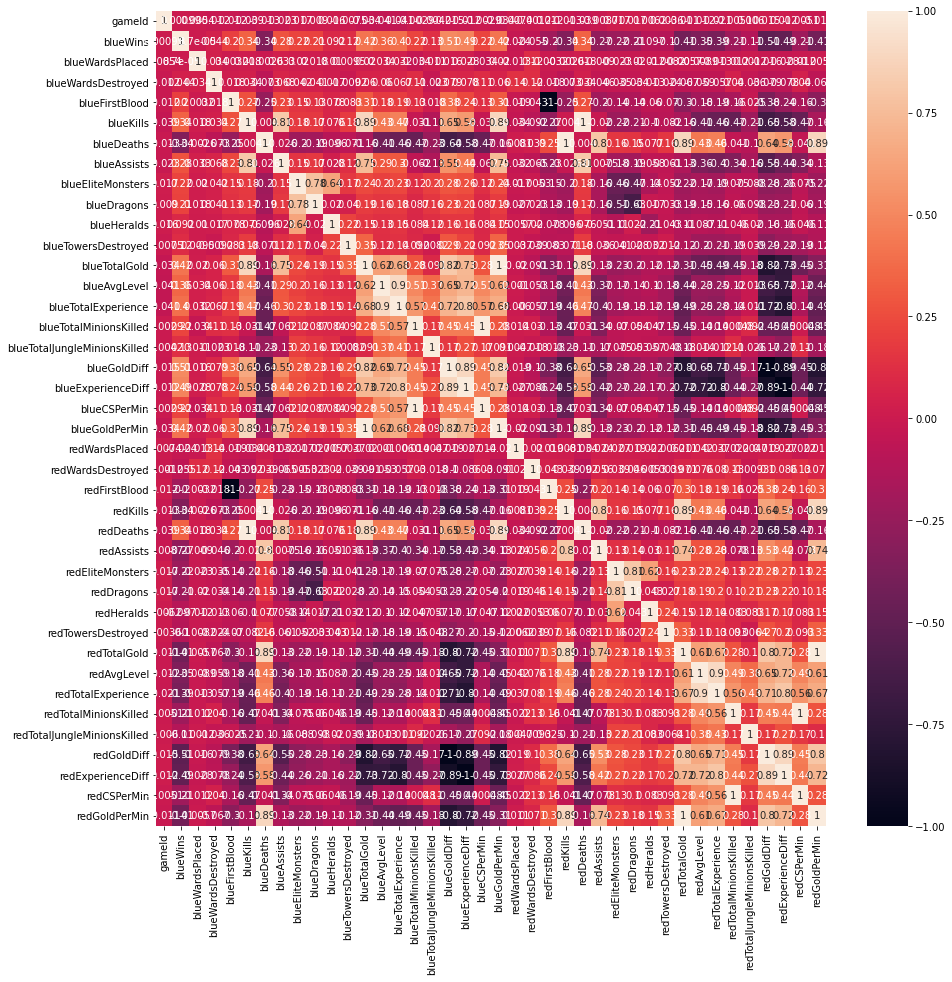

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
# gameid -> 연관 없음


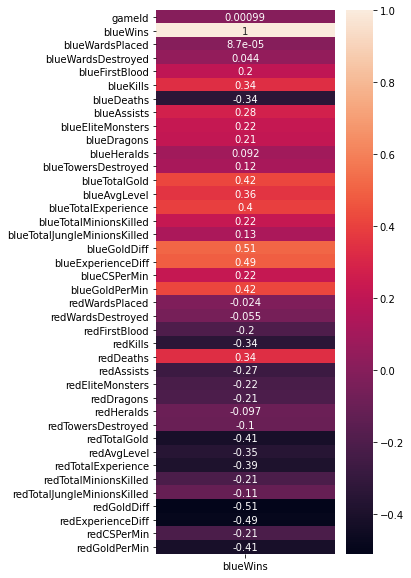

In [ ]:
fig = plt.figure(figsize=(4,10))
sns.heatmap(df.corr()[['blueWins']], annot=True)

# blue Wins -> 
# 와드 영향x -> 다들 설치할 것임
# 퍼스트 블러드 0.2
# Kills 0.34
# TotalGold 0.42
# GoldDiff 도 중요
# Goldpermin은 중요 하나 CSperMin은 덜 중요함

In [ ]:
fig = plt.figure(figsize=(20,20))
df.corr()

#redFirstBlood -1.000000 blueFirstBlood 1 또는 -1 과 같이 정확히 반대 되는 양과 음의 상관관계에서 LinearRegression과 Logistic 을 쓰면 multi coretunity problem 발생 학습이 잘 안될 수 있음

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

<Figure size 1440x1440 with 0 Axes>

### 6. 각 컬럼과 승리 여부의 관계 시각화


In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

### 수치형 데이터 시각화

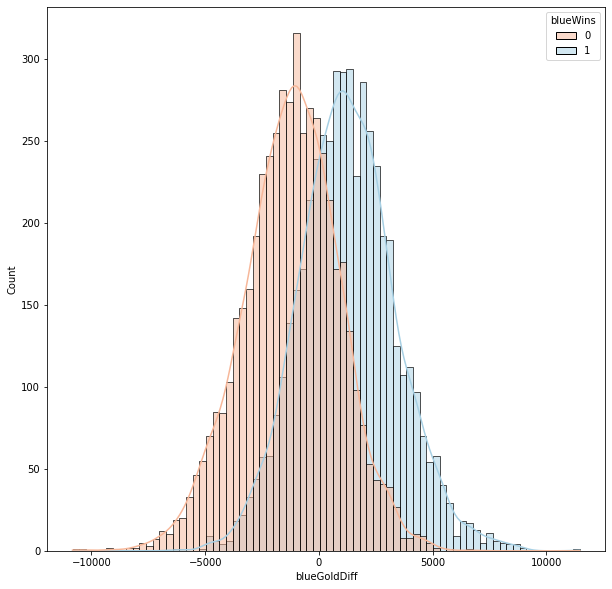

In [ ]:

# Seaborn의 countplot() -> 카테고리컬 데이터 확인 및 histplot() -> 수치형 데이터를 사용하여 각 컬럼과 승/패의 관계를 시각화
# 상관성이 가장 높았던 칼럼 확인 

fig = plt.figure(figsize=(10,10))
sns.histplot(x='blueGoldDiff', data=df, hue='blueWins', palette='RdBu', kde=True)




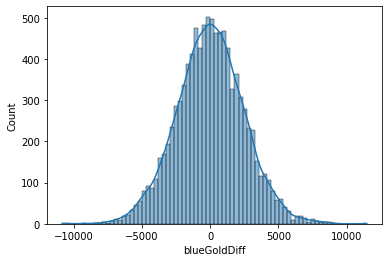

In [ ]:
sns.histplot(x='blueGoldDiff', data=df,  palette='RdBu', kde=True)


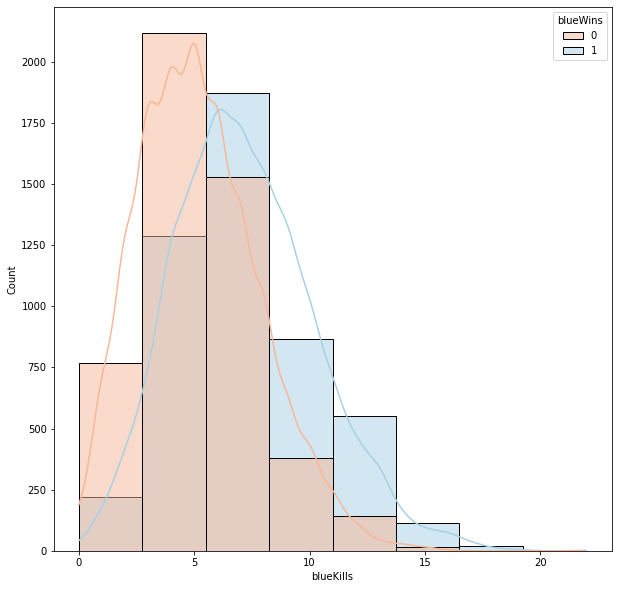

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(x='blueKills', data=df, hue='blueWins', palette='RdBu', kde=True, bins=8)

<Figure size 1440x1440 with 0 Axes>

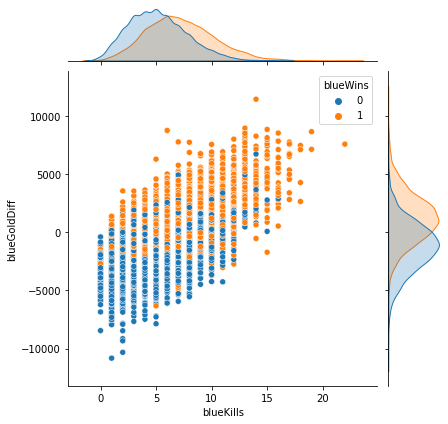

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins')

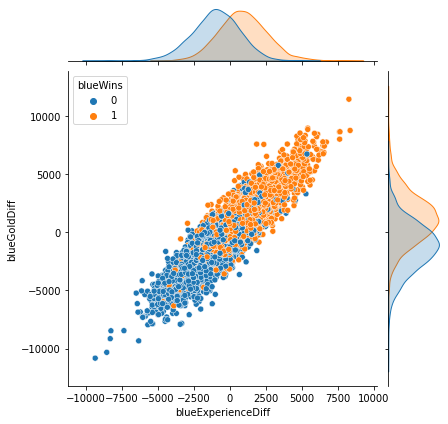

In [ ]:
sns.jointplot(x='blueExperienceDiff', y='blueGoldDiff', data=df, hue='blueWins')

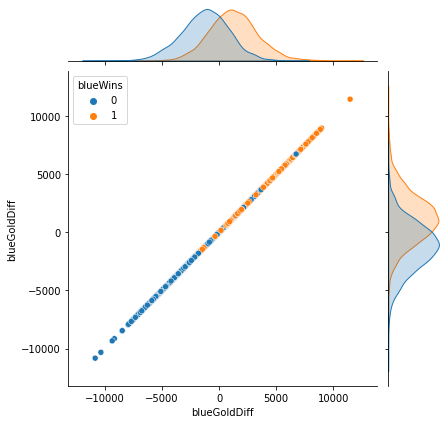

In [ ]:
sns.jointplot(x='blueGoldDiff', y='blueGoldDiff', data=df, hue='blueWins')

### 카테고리컬 데이터 수치화

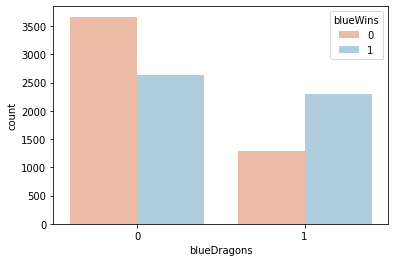

In [ ]:
sns.countplot(x='blueDragons', data=df, hue='blueWins', palette='RdBu')

# 블루가 드래곤을 죽일 수 있는 비율이 못죽이는 비율이 블루드래곤즈를 못죽이면 영향이 있음 

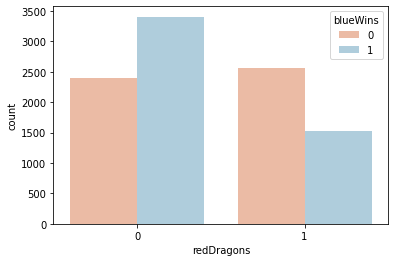

In [ ]:
sns.countplot(x='redDragons', data=df, hue='blueWins', palette='RdBu')

# 레드가 드래곤을 처치하는 것과 블루가 드래곤을 처치하는 것은 치우쳐있음

In [ ]:
sns.countplot(x='blueFirstBlood', data=df, hue='blueWins', palette='RdBue')

ValueError: ignored

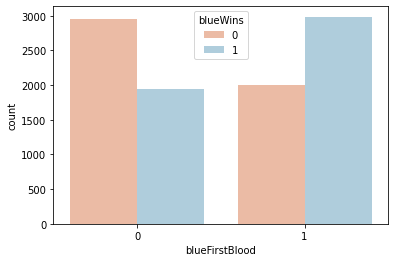

In [ ]:
sns.countplot(x='blueFirstBlood', data=df, hue='blueWins', palette='RdBu')

# 거의 비슷하기 때문에 균형이 있기 때문에 통계적으로는 크게 유의미하게 차이가 없음 첫번째 킬을 내는 것은 크게 차이가 없을듯

## Step 3. 모델 학습을 위한 데이터 전처리


### 7. StandardScaler를 이용해 수치형 데이터 표준화


In [ ]:
# multi coretunity problem이 있을 수 있는 확률이 높으니 전처리 필요

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold', 'redTotalExperience', 'redGoldDiff',
       'redExperienceDiff'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화
#Multicollinearity를 피하기 위해 불필요한 컬럼은 drop

X_num = df[['blueWardsPlaced', 'blueWardsDestroyed', 
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]
X_cat = df[['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 'redHeralds']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['blueWins']

In [ ]:
X

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
0,-0.998079,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,-1.465951,0.256228,0.013342,-0.992782,0.460179,-0.399207,1.532493,-0.914893,-0.198353,-0.410475,-0.928741,0.367685,-0.928741,0.052293,1,0,0,0,0
1,-0.998079,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,-0.758722,-1.191254,-0.593342,-1.953558,-1.166792,-0.561751,-0.805870,2.277700,4.412301,-0.410475,1.033784,0.068504,1.033784,0.758619,0,0,0,1,1
2,-0.998079,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,-0.455624,-0.483614,-0.520436,-1.404543,-0.254307,-0.399207,0.129475,-0.914893,-0.198353,-0.410475,-0.654900,-2.324944,-0.654900,0.533909,0,1,0,0,0
3,-0.998079,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,-0.718275,0.453671,-0.544350,0.013863,-0.718275,-0.876959,-0.399207,-0.338198,-0.914893,-0.198353,0.244627,0.805583,-0.430131,0.805583,-0.007406,0,0,1,0,0
4,-0.998079,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,-0.306513,0.655736,-0.415133,0.137283,-0.306513,-0.067382,-0.290844,-0.338198,0.681403,-0.198353,0.244627,0.349182,1.564408,0.349182,0.613731,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1.001925,-0.293496,-0.379275,0.271042,-0.728666,-0.404768,0.719503,-0.210439,0.821656,0.930738,0.865408,-0.260762,1.868129,1.020936,1.303263,-0.260762,0.821656,1.280419,0.129475,-0.914893,-0.198353,-0.410475,0.531742,-1.726582,0.531742,-0.833801,1,1,0,0,0
9875,1.001925,1.759976,-1.298863,-0.061087,-0.728666,0.333364,0.719503,-0.210439,-0.172894,0.930738,1.105315,0.745765,-0.253559,0.312888,0.479942,0.745765,-0.172894,-0.561751,8.547582,-0.914893,-0.198353,0.244627,-0.517980,0.467412,-0.517980,-0.692938,0,1,0,0,0
9876,-0.998079,0.039499,-0.839069,-0.061087,0.293944,-0.404768,-0.879231,-0.210439,-0.391082,0.275280,0.086541,-0.306513,-0.556657,-0.990702,-0.959957,-0.306513,-0.391082,-0.453388,-1.273543,0.681403,-0.198353,1.554831,1.992226,0.866319,1.992226,1.227490,0,0,0,1,0
9877,-0.998079,-0.459994,0.540312,-1.389604,-1.069536,-0.896856,0.719503,-0.210439,-1.331573,-1.035635,-0.582367,0.334004,-0.253559,-0.347874,-0.547516,0.334004,-1.331573,2.364049,0.597148,-0.914893,-0.198353,0.899729,1.353264,-1.128220,1.353264,-0.798921,1,1,0,0,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

###  8. 학습데이터와 테스트데이터 분리


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
5775,1.001925,-0.792989,-0.379275,0.271042,-1.410406,-0.158724,0.719503,-0.210439,-0.672448,1.586195,1.378543,-0.489518,0.554703,0.282724,0.975705,-0.489518,-0.672448,-0.453388,-0.805870,-0.914893,-0.198353,0.244627,0.486102,1.564408,0.486102,-1.157785,1,1,0,0,0
8906,-0.998079,6.310914,1.919694,-0.061087,-0.387796,-0.896856,0.719503,3.881937,0.436732,0.275280,0.441405,0.654263,-0.152526,0.200791,0.283095,0.654263,0.436732,0.846967,-0.338198,0.681403,-0.198353,0.244627,0.714303,0.567138,0.714303,0.119370,1,0,1,1,0
559,-0.998079,-0.182498,0.080519,0.271042,0.975684,0.333364,-0.879231,-0.210439,0.831425,-1.035635,-0.393273,1.294780,-1.061821,0.187339,-0.386080,1.294780,0.831425,-0.453388,-0.338198,-0.914893,-0.198353,0.244627,-0.472340,-0.031223,-0.472340,0.547995,1,0,0,0,0
2909,1.001925,-0.237997,0.080519,-0.725346,0.634814,-1.142900,2.318237,-0.210439,-1.140739,-0.380177,-0.913906,-0.352265,-0.657690,-1.029426,-1.072962,-0.352265,-1.140739,-0.290844,2.467838,-0.914893,-0.198353,1.554831,1.125064,0.966046,1.125064,0.519152,0,1,1,0,0
2781,1.001925,-0.459994,0.080519,-0.061087,-1.751276,-0.158724,-0.879231,-0.210439,0.366390,2.241653,1.776723,1.020273,2.474326,1.304644,1.397520,1.020273,0.366390,-0.615932,-0.805870,0.681403,-0.198353,-0.410475,0.120982,0.467412,0.120982,-1.769532,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.001925,-0.570992,0.080519,0.935301,0.293944,0.333364,0.719503,-0.210439,0.768900,1.586195,1.587629,0.334004,-0.253559,0.246853,0.093539,0.334004,0.768900,0.413516,-0.338198,0.681403,-0.198353,0.899729,-0.928741,1.664135,-0.928741,0.385668,0,1,0,0,1
7813,-0.998079,0.649991,0.540312,0.271042,0.293944,-0.158724,-0.879231,-0.210439,0.528566,0.275280,0.586349,0.059497,-0.253559,0.115190,0.287261,0.059497,0.528566,-0.290844,1.532493,-0.914893,-0.198353,0.244627,0.166622,-0.529858,0.166622,0.354812,0,0,0,0,0
905,-0.998079,-0.515493,-1.298863,-0.393216,-0.728666,-0.896856,0.719503,-0.210439,-0.353306,0.275280,-0.215009,0.334004,-0.657690,-0.022588,-0.507417,0.334004,-0.353306,-0.399207,-0.805870,-0.914893,-0.198353,0.899729,0.714303,0.866319,0.714303,-0.326695,0,1,0,0,0
5192,-0.998079,-0.515493,-1.298863,-0.393216,1.316554,0.087320,-0.879231,-0.210439,-1.798562,-4.312922,-4.475032,-4.286871,-3.284541,-2.331386,-2.775844,-4.286871,-1.798562,-0.507569,-0.805870,0.681403,-0.198353,-0.410475,0.029701,-1.128220,0.029701,1.984125,0,0,0,1,0


In [ ]:
X_test

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
4928,1.001925,-0.459994,-0.379275,1.267430,-1.751276,0.579408,-0.879231,-0.210439,1.185737,1.586195,1.115311,-0.809777,0.352638,1.846788,1.951608,-0.809777,1.185737,-0.399207,-0.805870,-0.914893,-0.198353,-2.375781,-1.020021,-0.529858,-1.020021,-1.817828,1,0,0,0,0
2754,1.001925,-0.515493,0.080519,0.603172,-1.069536,0.087320,0.719503,-0.210439,0.530520,1.586195,1.487668,1.249029,0.352638,1.130995,1.695915,1.249029,0.530520,-0.399207,-0.805870,-0.914893,-0.198353,-1.720679,-0.654900,0.866319,-0.654900,-1.314747,0,1,0,0,0
8662,1.001925,-0.348995,-0.379275,0.935301,-1.069536,0.825451,0.719503,-0.210439,1.147962,0.930738,1.041173,1.706541,0.352638,1.363750,0.899153,1.706541,1.147962,-0.345025,-0.338198,-0.914893,-0.198353,-0.410475,0.805583,-0.330404,0.805583,-1.061865,1,1,0,0,0
5720,-0.998079,0.261496,-0.379275,-0.393216,-0.728666,-0.158724,-0.879231,-0.210439,-0.502456,-1.035635,-1.121326,0.059497,-0.657690,0.001054,-0.510542,0.059497,-0.502456,-0.399207,0.129475,-0.914893,-0.198353,0.244627,1.398904,-0.729312,1.398904,-0.519208,0,0,0,0,0
5435,1.001925,-0.404494,1.000106,-0.725346,-1.069536,-0.650812,-0.879231,-0.210439,-0.487476,0.930738,1.596792,0.379755,1.362965,0.381777,1.159533,0.379755,-0.487476,-0.290844,-0.338198,2.277700,-0.198353,0.244627,-0.928741,-0.330404,-0.928741,-1.130284,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,1.001925,-0.237997,1.000106,2.928077,-0.387796,2.055671,0.719503,3.881937,2.965114,0.930738,0.906225,-0.489518,-1.566984,2.208760,1.769342,-0.489518,2.965114,0.467697,0.597148,-0.914893,-0.198353,-1.720679,-1.111301,0.168231,-1.111301,-0.580919,0,0,1,0,0
1817,1.001925,2.869961,0.080519,1.267430,0.293944,0.579408,0.719503,-0.210439,1.110837,0.930738,0.768778,-0.352265,-0.051493,0.949194,1.516253,-0.352265,1.110837,-0.290844,0.129475,0.681403,-0.198353,-1.720679,-2.161023,0.267958,-2.161023,-0.417921,0,0,1,1,0
1075,-0.998079,-0.293496,-0.379275,-1.389604,-1.069536,-1.388944,-0.879231,-0.210439,-0.560423,-0.380177,0.373098,0.745765,2.171227,-0.431845,0.105516,0.745765,-0.560423,-0.236662,-0.805870,-0.914893,4.412301,0.899729,0.531742,0.068504,0.531742,0.133456,1,0,0,0,0
4895,1.001925,-0.404494,-0.379275,-0.061087,-1.751276,0.579408,-0.879231,-0.210439,0.555921,1.586195,1.783387,0.883019,0.554703,0.821607,0.752299,0.883019,0.555921,-0.236662,-0.805870,-0.914893,-0.198353,0.244627,1.581465,1.763862,1.581465,-0.779468,1,0,0,0,0


In [ ]:
y_train

5775    1
8906    0
559     0
2909    1
2781    1
       ..
2895    1
7813    0
905     0
5192    0
235     0
Name: blueWins, Length: 6915, dtype: int64

In [ ]:
y_test

4928    1
2754    1
8662    1
5720    0
5435    1
       ..
3679    1
1817    1
1075    0
4895    1
145     1
Name: blueWins, Length: 2964, dtype: int64

## Step 4. Classification 모델 학습


###  9. Logistic Regression 모델 생성/학습


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 10. 모델 학습 결과 평가


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



###  11. XGBoost 모델 생성/학습


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

###  12. 모델 학습 결과 평가


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



## Step5 모델 학습 결과 심화 분석

###  13. Logistic Regression 모델 계수로 상관성 파악

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot
model_lr.coef_.shape




(1, 31)

In [ ]:
model_lr.coef_[0]

array([-0.03722312, -0.02280321, -0.16394534,  0.00258791, -0.03347599,
        0.11396334, -0.1138962 ,  0.30622615, -0.07285938,  0.03729869,
       -0.0372248 ,  0.01932872,  0.44377859,  0.42423486, -0.0372248 ,
        0.30622615, -0.02448855, -0.0133212 ,  0.07023347, -0.07907826,
        0.05399199, -0.00977213,  0.03659856,  0.03652838,  0.03659856,
       -0.4148868 ,  0.03551527,  0.17068559, -0.11330011, -0.13009491,
        0.06607254])

<BarContainer object of 31 artists>

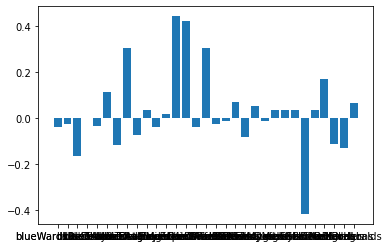

In [ ]:
plt.bar(X.columns, model_lr.coef_[0])


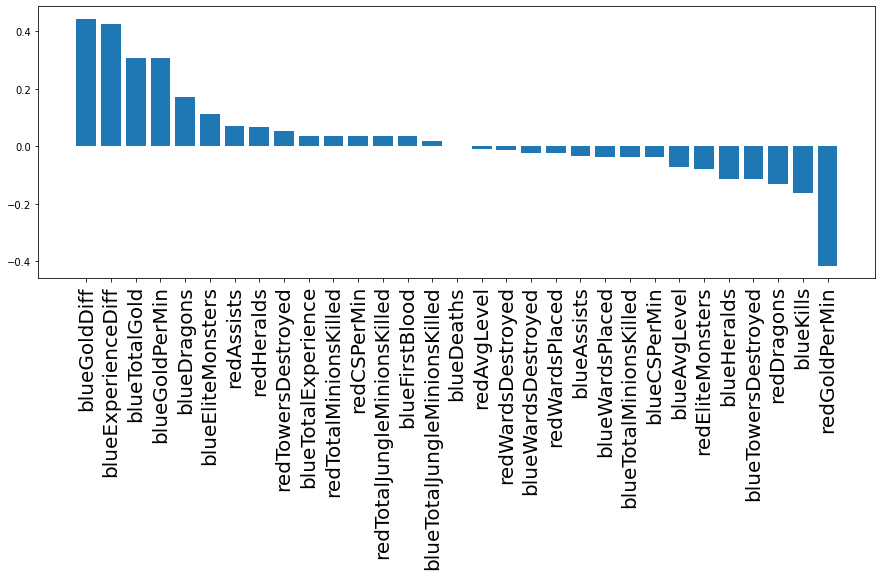

In [ ]:
#sorting
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=['Model Coefficient'])
model_coef.sort_values(by='Model Coefficient', ascending=False, inplace=True)                        
plt.figure(figsize=(15,5))
plt.bar(model_coef.index, model_coef['Model Coefficient'])
plt.xticks(rotation=90, fontsize=20)
plt.show()


###  14. XGBoost 모델로 특징의 중요도 확인

<BarContainer object of 31 artists>

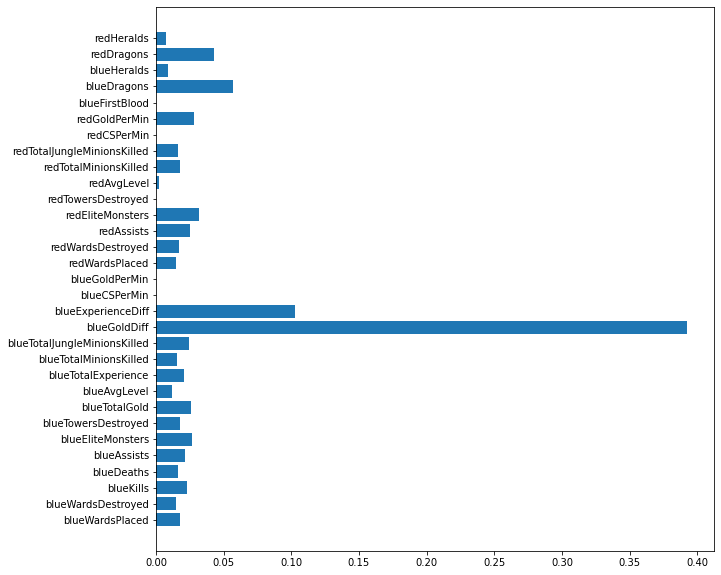

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot 확인
fig = plt.figure(figsize= (10, 10))
plt.barh(X.columns, model_xgb.feature_importances_ )


In [ ]:
def riot_timeline_dataset(pre_dataset,api_key,timeline):
    
    challenger_game = pre_dataset
    my_api = api_key
    
    
    #수집할 컬럼 정의
    use_columns = ['gameId','blueWins','blueTotalGolds','blueCurrentGolds','blueTotalLevel'\
                           ,'blueAvgLevel','blueTotalMinionKills','blueTotalJungleMinionKills'
                           ,'blueFirstBlood','blueKill','blueDeath','blueAssist'\
                           ,'blueWardPlaced','blueWardKills','blueFirstTower','blueFirstInhibitor'\
                           ,'blueFirstTowerLane'\
                           ,'blueTowerKills','blueMidTowerKills','blueTopTowerKills','blueBotTowerKills'\
                           ,'blueInhibitor','blueFirstDragon','blueDragnoType','blueDragon','blueRiftHeralds'\
                           ,'redWins','redTotalGolds','redCurrentGolds','redTotalLevel'\
                           ,'redAvgLevel','redTotalMinionKills','redTotalJungleMinionKills'
                           ,'redFirstBlood','redKill','redDeath','redAssist'\
                           ,'redWardPlaced','redWardKills','redFirstTower','redFirstInhibitor'\
                           ,'redFirstTowerLane'\
                           ,'redTowerKills','redMidTowerKills','redTopTowerKills','redBotTowerKills'\
                           ,'redInhibitor','redFirstDragon','redDragnoType','redDragon','redRiftHeralds']

    challenger_timeline_df1 = pd.DataFrame()
    challenger_timeline_df = pd.DataFrame()
    error_list = []
    match_url = \
        'https://kr.api.riotgames.com/lol/match/v4/timelines/by-match/{}?api_key=' +  my_api



    for b in range(len(challenger_game)):


        try:
            game_id = challenger_game['gameId'].iloc[b]
            req = requests.get(match_url.format(game_id))
            print('status : ' + str(req.status_code) + '  loop location : ' + str(b))

            if req.status_code == 200:
                pass

            elif req.status_code == 429:
                print('api cost full : infinite loop start')
                print('loop location : ',b)
                start_time = time.time()

                while True:
                    if req.status_code == 429:

                        print('try 10 second wait time')
                        time.sleep(10)

                        req = requests.get(match_url.format(game_id))
                        print(req.status_code)

                    elif req.status_code == 200:
                        print('total wait time : ', time.time() - start_time)
                        print('recovery api cost')
                        break

            elif req.status_code == 503:
                print('service available error')
                start_time = time.time()

                while True:
                    if req.status_code == 503 or req.status_code == 429:

                        print('try 10 second wait time')
                        time.sleep(10)

                        req = requests.get(match_url.format(game_id))
                        print(req.status_code)

                    elif req.status_code == 200:
                        print('total error wait time : ', time.time() - start_time)
                        print('recovery api cost')
                        break
            elif req.status_code == 403: # api갱신이 필요
                print('you need api renewal')
                print('break')
                break

            '''
            pre_data0 = json_normalize(req.json())
            pre_data0['gameId'] = game_id

            pre_data = pre_data.append(pre_data0)
            '''
            
            #json data에서 필요한 frames 데이터만
            frames = req.json()['frames']
            
            #시작하고 n분 즉, 수집하고 싶은 시간까지의 인덱스가 어디있을지 추출하는 코드
            lc0 = 0 # 위치
            while True:
                try:
                    timestamps = frames[lc0]['timestamp']

                    if timestamps <= timeline: # n Minute를 설정(Ms단위의 timeline)
                        lc0 += 1

                    else:
                        lc = lc0-1
                        break
                except:
                    lc = lc0 - 1

                    break


SyntaxError: ignored

In [ ]:

            # participants 1~5 까지는 blueteam, 6~10까지는 redteam
            # participant = frames[lc]['participantFrames']
            # bluetotal_gold, bluecurrent_gold, bluetotal_level, bluetotal_minionkill, bluetotal_jungleminionkill = [],[],[],[],[]
            # redtotal_gold, redcurrent_gold, redtotal_level,redtotal_minionkill, redtotal_jungleminionkill = [],[],[],[],[]